#### write some code to analyze the trajectory of ballistic or projectile motion in a video to determine if it is real or not. Ballistic motion occurs when the only significant force on an object is gravity (e.g., a basketball free-throw).


In [1]:
import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt
import time
import IPython.display as dis

In [2]:
#Load the CSV file into a 25 x 2 numpy matrix.
file = open('coordinates.csv')
numpy_array = np.loadtxt(file, delimiter=",")

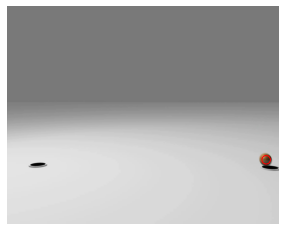

In [3]:
#import images and overlay the cordinates over each frame 
for i in range (25):
    
    img = plt.imread('frame'+ str(i+1)+ '.png')
    plt.imshow(img)
    
    #draw circle at the cordinate 
    ax = plt.gca()
    circle = plt.Circle((numpy_array[i][0], numpy_array[i][1]), 20, color='red', fill=False)
    ax.add_artist(circle)

    plt.axis('off')
    plt.show()

    time.sleep(0.5)
    dis.clear_output(wait=True)


In [4]:
#Fit a parabola y = ax^2 + bx + c to the coordinates using least-squares estimation 
x = np.array([])
y = np.array([])

for i in range (25):
    x = np.append(x, [numpy_array[i][0]], axis= 0)
    y = np.append(y, [numpy_array[i][1]],axis= 0)

#matrix and vector equation
m = np.stack((np.square(x), x, np.ones((25))), axis= 1)
u = inv(np.transpose(m)@m)@np.transpose(m)@y

#get the y_est cordinates from the least squared equation
y_est = u[0] * x * x + u[1] * x + u[2]

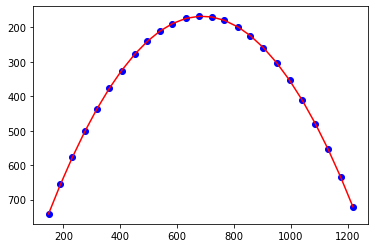

In [5]:
#plot the least-squares curve overlaid atop the 25 selected points. 
plt.plot(x,y_est,'bo')
plt.plot(x,y_est,'r-')
plt.gca().invert_yaxis()
plt.show()

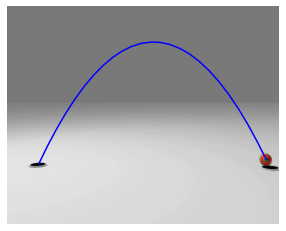

In [7]:
# Write some code to display each video frame. 
# Overlay on each frame the user-selected position of the ball and the full parabolic trajectory

for i in range (25):
    img = plt.imread('frame'+ str(i+1)+ '.png')
    plt.imshow(img)
    
    #plot the actual x-y position of the ball
    ax = plt.gca()
    circle = plt.Circle((numpy_array[i][0], numpy_array[i][1]), 20, color='red', fill=False)
    ax.add_artist(circle)
    
    # plot the y_est curve
    plt.plot(x,y_est,'b-')
    plt.axis('off')
    plt.show()

    time.sleep(0.5)
    dis.clear_output(wait=True)